Try to implement the functions in fsmc_code.py and complete lines with "###"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import null_space

# Old code for making LaTeX work
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']

%matplotlib inline

In [2]:
from fsmc_code import compute_Phi_ET, simulate_hitting_time, stationary_distribution

In [3]:
# Test script for fsmc_code.py
#
# Desired output of this script
# -----------------------------
#
# Markov transition matrix:
#  [[0.5 0.5 0. ]
#  [0.5 0.  0.5]
#  [0.  0.  1. ]] 
#
# Expected hitting times E[T_ij]:
#  [[0.         2.         5.98897748]
#  [0.5        0.         3.99318771]
#  [0.         0.         0.        ]] 
#
# Pr(T_ij <= 2):
#  [[1.   0.75 0.25]
#  [0.5  1.   0.5 ]
#  [0.   0.   1.  ]] 
#
# Pr(T_ij <= 3):
#  [[1.    0.875 0.375]
#  [0.5   1.    0.625]
#  [0.    0.    1.   ]] 
#
# E[T_1j] Sim:
#  [0.    2.026 6.018] 
#
# Markov transition matrix:
#  [[0.7 0.2 0.1]
#  [0.2 0.3 0.5]
#  [0.1 0.2 0.7]] 
#
# Stationary distribution:
#  [0.30555556 0.22222222 0.47222222] 


# Test code for expected hitting time
P = np.array([[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0, 1]])  
Phi_list, ET = compute_Phi_ET(P, 40)
print("Markov transition matrix:\n",P,"\n")
print("Expected hitting times E[T_ij]:\n",ET,"\n")
print("Pr(T_ij <= 2):\n",Phi_list[2],"\n")
print("Pr(T_ij <= 3):\n",Phi_list[3],"\n")

# Test code for simulating hitting time
ETsim = np.zeros([3])
for j in range(3):
    T = simulate_hitting_time(P, [0, j], 500)
    ETsim[j] = np.mean(T)
print("E[T_1j] Sim:\n",ETsim,"\n")

# Test code for computing stationary distribution
P = np.array([[0.7, 0.2, 0.1], [0.2, 0.3, 0.5], [0.1, 0.2, 0.7]])
pi = stationary_distribution(P)
print("Markov transition matrix:\n",P,"\n")
print("Stationary distribution:\n",pi,"\n")

Markov transition matrix:
 [[0.5 0.5 0. ]
 [0.5 0.  0.5]
 [0.  0.  1. ]] 

Expected hitting times E[T_ij]:
 [[0.         2.         5.98897748]
 [0.5        0.         3.99318771]
 [0.         0.         0.        ]] 

Pr(T_ij <= 2):
 [[1.   0.75 0.25]
 [0.5  1.   0.5 ]
 [0.   0.   1.  ]] 

Pr(T_ij <= 3):
 [[1.    0.875 0.375]
 [0.5   1.    0.625]
 [0.    0.    1.   ]] 

E[T_1j] Sim:
 [0.   2.   6.13] 

Markov transition matrix:
 [[0.7 0.2 0.1]
 [0.2 0.3 0.5]
 [0.1 0.2 0.7]] 

Stationary distribution:
 [[0.30555556]
 [0.22222222]
 [0.47222222]] 



### Exercise 1

What is the distribution of the number of fair coin tosses before one observes 3 heads in a row? To solve this, consider a 4-state Markov chain with transition probability matrix
$$
    P = 
    \begin{bmatrix}
        0.5 & 0.5 & 0 & 0 \\
        0.5 & 0 & 0.5 & 0 \\
        0.5 & 0 & 0 & 0.5 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$
where $ X_t = 1 $ if the previous toss was tails, $ X_t = 2 $ if the last two tosses were tails then heads, $ X_t = 3 $ if the last three tosses were tails then heads twice, and $ X_t = 4 $ is an absorbing state that is reached when the last three tosses are heads. 

* ** (15 pts) ** Write a computer program (e.g., in Python, Matlab, ...) to compute $ \Pr(T_{1,4} = m) $ for $ m = 1, 2, \ldots, 100 $ and ** (10 pts) ** use this to compute and print an estimate of the expected number of tosses $ \mathbb{E}[T_{1,4}] $ 

Text(0.5, 1.0, 'E[T_{1,4}] = 13.970568255020394')

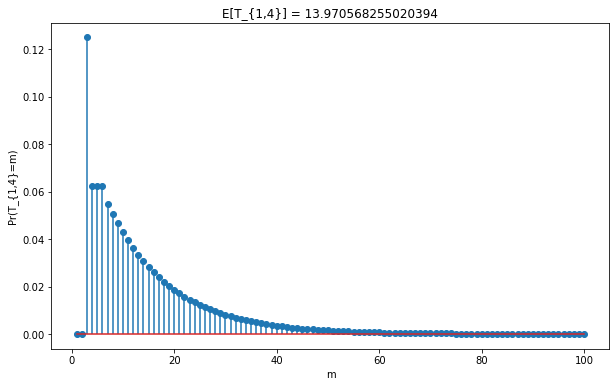

In [4]:
# See compute_Phi_ET in fsmc_code.py

P = np.array([[0.5, 0.5, 0, 0], [0.5, 0, 0.5, 0], [0.5, 0, 0, 0.5], [0, 0, 0, 1]])  
Phi_list, ET = compute_Phi_ET(P, 100)

m = np.arange(1, 101)                             ### steps to be plotted
Pr = Phi_list[m, 0, 3] - Phi_list[(m - 1), 0, 3]  ### \Pr(T_{1,4} = m) for all m
E = ET[0, 3]                                       ### \mathbb{E}[T_{1,4}]

plt.figure(figsize=(10, 6))
plt.stem(m, Pr, use_line_collection=True)
plt.xlabel(r'm')
plt.ylabel(r'Pr(T_{1,4}=m)')
plt.title(r'E[T_{1,4}] = ' + str(E))

* ** (15 pts) ** Write a computer program that generates 500 realizations from this Markov chain and ** (10 pts) ** uses them to plot a histogram of $ T_{1,4} $ and compute/print an estimate of the expected number of tosses $ \mathbb{E}[T_{1,4}] $.

Text(0.5, 1.0, 'mean of T_{1,4} = 14.276')

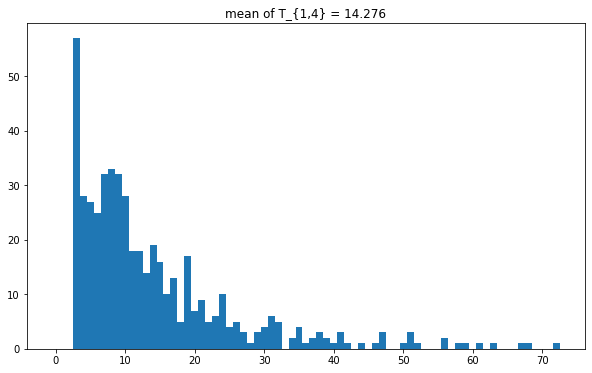

In [5]:
# implement simulate_hitting_time(P, states, nr) in fsmc_code.py
        
T = simulate_hitting_time(P, [0, 3], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of T_{1,4} = ' + str(np.mean(T)))

### Exercise 2

Consider the miniature chutes and ladders game shown in Figure 1. 
Assume a player starts on the space labeled 1 and plays by rolling a fair four-sided die and then moves that number of spaces. 
If a player lands on the bottom of a ladder, then they automatically climb to the top. 
If a player lands at the top of a slide, then they automatically slide to the bottom. 
This process can be modeled by a Markov chain with $ n = 16 $ states where each state is associated with a square where players can start their turn (e.g., players never start at the bottom of a ladder or the top of a slide). 
To finish the game, players must land exactly on space 20 (moves beyond this are not taken). 

* ** (10 pts) ** Compute the transition probability matrix $ P $ of the implied Markov chain. 

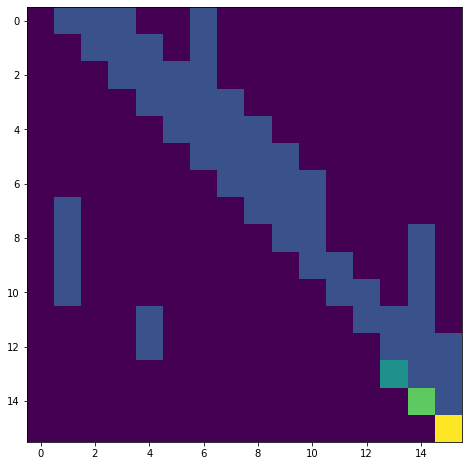

In [6]:
# You can either do this by hand (e.g., look at picture and write down matrix) or by automating the process.

# By hand
# P = np.asarray([[...],[...],[...],...])

###

# Or automated general function for Chutes and Ladders games
def construct_P_matrix(n, dice, chutes, ladders):
    '''
    Arguments:
        n {int} -- size of the state space
        dice {numpy.array} -- probability distribution of the dice outcome
        chutes {list[(int, int)]} -- the list of chutes, in pairs of (start, end)
        ladders {list[(int, int)]} -- the list of ladders, in pairs of (start, end)

    Returns:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
    '''
    # Add code here to build matrix
    
    ################################################################################
    P = np.zeros((n, n))
    num_ladders = len(ladders)
    num_chutes  = len(chutes)
    dice_length = len(dice)
    n_expand = n + num_ladders + num_chutes
    P_expand = np.zeros((n_expand, n_expand))
    remove = [0] * (num_ladders + num_chutes)
    
    for i in range(0, n_expand) :
        if i + dice_length < n_expand :
            P_expand[i, (i+1):(i+1+dice_length)] = dice
        else :
            P_expand[i, i]      = 1 - sum(dice[0:(n_expand-(i+1))])
            P_expand[i, (i+1):n_expand] = dice[0:(n_expand-(i+1))]
            
    for j in range(0, num_ladders) :
        P_expand[:, (ladders[j][1]-1)] = P_expand[:, (ladders[j][1]-1)] + P_expand[:, (ladders[j][0]-1)]
        remove[j] = ladders[j][0] - 1
        
    for k in range(0, num_chutes) :
        P_expand[:, (chutes[k][1]-1)] = P_expand[:, (chutes[k][1]-1)] + P_expand[:, (chutes[k][0]-1)]
        remove[num_ladders + k] = chutes[k][0] - 1
        
    P_remove_row = np.delete(P_expand, remove, 0)
    P_remove_row_column = np.delete(P_remove_row, remove, 1)
    P = P_remove_row_column
    P[n-1, n-1] = 1
    ################################################################################
    
    return P

n = 16 ### number of states
dice = np.array([1/4, 1/4, 1/4, 1/4]) ### probability distribution of dice
chutes = [(13, 2), (17, 6)]               ### (sorce, destination) pairs of chutes
ladders = [(4, 8), (14, 19)]              ### (sorce, destination) pairs of ladders
P = construct_P_matrix(n, dice, chutes, ladders)
###

# Plot transition matrix
plt.figure(figsize=(8, 8))
plt.imshow(P)

* ** (10 pts) ** For this Markov chain, use function from Exercise 1 to compute and plot the cumulative distribution of the number turns a player takes to finish (i.e., the probability $ \Pr(T_{1, 20} \le m) $ where $ T_{1, 20} $ is the hitting time from state 1 to state 20).
Compute and print the mean $\mathbb{E}[T_{1,20}]$. 

Text(0.5, 1.0, 'E[T_{1,20}] = 12.792331782072552')

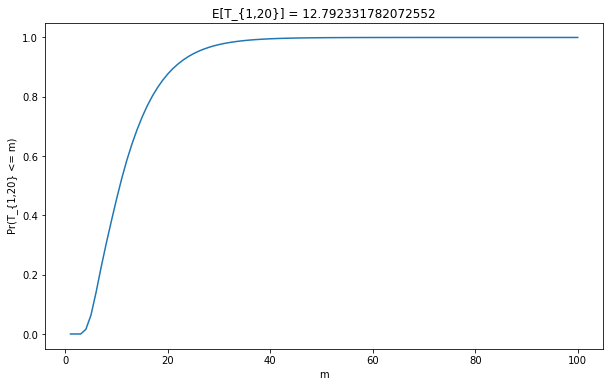

In [7]:
# Use previous functions to complete this exercise
Phi_list, ET = compute_Phi_ET(P, ns=100)

m = np.arange(1, 101)   ### steps to be plotted
Pr = Phi_list[m, 0, 15] ### \Pr(T_{1,20} <= m) for all m
E = ET[0, 15]           ### \mathbb{E}[T_{1,20}]

plt.figure(figsize=(10, 6))
plt.plot(m ,Pr)
plt.xlabel(r'm')
plt.ylabel(r'Pr(T_{1,20} <= m)')
plt.title(r'E[T_{1,20}] = ' + str(E))

* ** (10 pts) ** Use function from Exercise 1 to generate 500 realizations from this Markov chain.  Then, use them to plot a histogram of $ T_{1, 20} $ and compute/print an estimate of the expected number of tosses $\mathbb{E}\left[T_{1,20}\right]$.

Text(0.5, 1.0, 'mean of T_{1,20} =12.598')

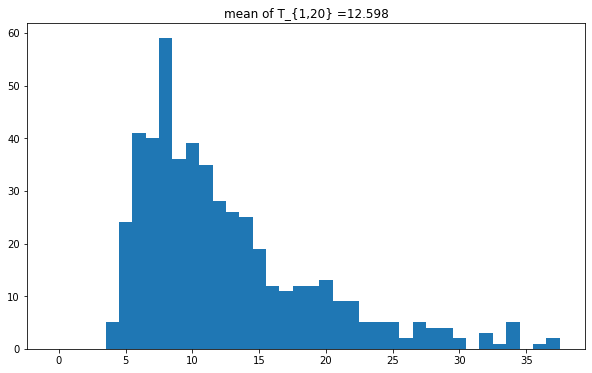

In [8]:
# Use previous funcitons to complete this exercise
T = simulate_hitting_time(P, [0, n-1], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of T_{1,20} =' + str(np.mean(T)))

* Optional Challenge: If the ﬁrst player rolls 4 and climbs the ladder to square 8, then what is the probability that the second player will win.

In [9]:
# Use previous functions to complete this exercise

### compute Pr_win

### Example 1

In a certain city, it is said that the weather is rainy with a 90% probability if it was rainy the previous day and with a 50% probability if it not rainy the previous day. 
If we assume that only the previous day’s weather matters, then we can model the weather of this city by a Markov chain with $ n = 2 $ states whose transitions are governed by
$$
    P = 
    \begin{bmatrix}
        0.9 & 0.1 \\
        0.5 & 0.5
    \end{bmatrix}
$$
Under this model, what is the steady-state probability of rainy weather?


In [10]:
# implement stationary_distribution(P) in fsmc.py

P = np.array([[0.9, 0.1], [0.5, 0.5]])
stationary_distribution(P)

array([[0.83333333],
       [0.16666667]])

### Exercise 3

** (10 pts) ** Write a program to compute the stationary distribution of a Markov chain when it is unique.
Consider a game where the gameboard has 8 diﬀerent spaces arranged in a circle. 
During each turn, a player rolls two 4-sided dice and moves clockwise by a number of spaces equal to their sum. 
** (5 pts) ** Define the transition matrix for this 8-state Markov chain and compute its stationary distribution.

In [11]:
# Use previous functions to complete this exercise
### construct the transition matrix
############################################################
P = np.zeros((8, 8))
###       [1/16, 0, 1/16, 2/16, 3/16, 4/16, 3/16, 2/16]
P[0, :] = [1/16, 0, 1/16, 1/8, 3/16, 1/4, 3/16, 1/8]
for row_state in range(1, 8) :
    P[row_state, :] = np.roll(P[row_state-1, :], 1)
############################################################
print(P)
stationary_distribution(P)

[[0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875 0.125 ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([[0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125]])

Next, suppose that one space is special (e.g., state-1 of the Markov chain) and a player can only leave this space by rolling doubles (i.e., when both dice show the same value). Again, the player moves clockwise by a number of spaces equal to their sum. ** (5 pts) ** Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

In [12]:
# Use previous functions to complete this exercise
### construct the transition matrix
##############################################################
P = np.zeros((8, 8))
P[0, :] = [13/16, 0, 1/16, 0, 1/16, 0, 1/16, 0]
###               [1/16, 0, 1/16, 2/16, 3/16, 4/16, 3/16, 2/16]
P[1, :] = np.roll([1/16, 0, 1/16, 1/8, 3/16, 1/4, 3/16, 1/8], 1)
for row_state in range(2, 8) :
    P[row_state, :] = np.roll(P[row_state-1, :], 1)
##############################################################
print(P)
stationary_distribution(P)

[[0.8125 0.     0.0625 0.     0.0625 0.     0.0625 0.    ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([[0.41836864],
       [0.08285234],
       [0.10176963],
       [0.07092795],
       [0.09311176],
       [0.0625555 ],
       [0.09593429],
       [0.07447989]])